
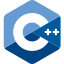
<br>

<div style="text-align:center; font-size:200%;">
  <b>SRP Workshop</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 02 SRP Workshop.ipynb -->
<!-- slides/module_500_solid_grasp/topic_310_workshop_srp.cpp -->


## Recap: Single Responsibility Principle (SRP, SOLID)

- A module should have one, and only one, reason to change
- Alternately: A module should be responsible to one, and only one, actor


## Resolution Strategies

<div>
<img src="img/book_resolution_1_srp.svg"
     style="float:left;padding:5px;width:40%"/>
<img src="img/book_resolution_2_srp.svg"
     style="float:right;padding:5px;width:50%"/>
</div>


<img src="img/book_resolution_1.svg"
     style="display:block;margin:auto;width:100%"/>


<img src="img/book_resolution_2.svg"
     style="display:block;margin:auto;width:100%"/>


## Workshop: Weather App

Imagine a versatile weather application called WeatherWise. WeatherWise
provides its users with up-to-date weather information sourced from various
online platforms. Beyond just showing current conditions, the app allows
users to view the forecast in different visual formats, and it logs errors
for any issues during data fetch or parsing.

While WeatherWise is well-received for its features, the development team
faces challenges maintaining and extending the application. Developers have
noticed that the core class, `Weather`, is becoming increasingly complex. It
handles everything from data fetching to data display. This complexity makes
it challenging to introduce new features without risking the introduction of
bugs.

Your task: Refactor the `Weather` class, ensuring that each class in the
system adheres to the Single Responsibility Principle. By doing so, you'll
set the foundation for a more maintainable and scalable application.


### Weather App Class Diagram

<img src="img/weather_app_class.svg"
     style="display:block;margin:auto;width:40%"/>


### RunWeatherApp() Sequence Diagram

<img src="img/weather_app_sequence.svg"
     style="display:block;margin:auto;width:30%"/>

In [ ]:
#include <iostream>
#include <sstream>
#include <string>
#include <vector>

In [ ]:
class Weather
{
public:
    void FetchDataFromSource();
    void ParseData();
    void DisplayInFormatA();
    void DisplayInFormatB();
    void LogError(const std::string& errorMsg);
    std::string FormatData() const;

private:
    std::string rawData_;
    std::vector<double> data_;
};

In [ ]:
void Weather::FetchDataFromSource()
{
    // Simulating fetching data from some source
    rawData_ = "Sunny, 25°C";
    std::cout << "Data fetched from source.\n";
}

In [ ]:
void Weather::ParseData()
{
    // Simulate data parsing
    if (rawData_.empty()) {
        LogError("No data available");
        return;
    }
    data_ = {10.0, 12.0, 8.0, 15.0, 20.0, 22.0, 25.0};
    std::cout << "Data parsed: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatA()
{
    // Simulating one display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format A: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatB()
{
    // Simulating another display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format B: === " << FormatData() << " ===\n";
}

In [ ]:
void Weather::LogError(const std::string& errorMsg)
{
    // Simulating error logging
    std::cout << "Error: " << errorMsg << "\n";
}

In [ ]:
std::string Weather::FormatData() const
{
    std::ostringstream stream;
    std::copy(
        data_.begin(), data_.end(), std::ostream_iterator<double>(stream, ", "));
    return stream.str();
}

In [ ]:
void RunWeatherApp(bool introduceError = false)
{
    Weather w;
    w.FetchDataFromSource();
    if (!introduceError) {
        w.ParseData();
    }
    w.DisplayInFormatA();
    w.DisplayInFormatB();
}

In [ ]:
RunWeatherApp();

In [ ]:
RunWeatherApp(true);


### Implementation after Resolving SRP Violations:


### Weather App Class Diagram

<img src="img/weather_app_class_srp.svg"
     style="display:block;margin:auto;width:100%"/>


### RunWeatherApp() Sequence Diagram

<img src="img/weather_app_sequence_srp.svg"
     style="display:block;margin:auto;width:75%"/>

In [ ]:
#include <iostream>
#include <sstream>
#include <string>
#include <vector>

In [ ]:
class WeatherErrorLogger
{
public:
    // Assume that the logger has internal state and this cannot be static.
    void LogError(const std::string& errorMsg) const
    {
        std::cout << "Error: " << errorMsg << "\n";
    }
};

In [ ]:
class WeatherData
{
public:
    WeatherData(const std::vector<double>& data) : data_(data) {}
    WeatherData() = default;

    const std::vector<double>& GetData() const { return data_; }

    std::string FormattedData() const
    {
        if (data_.empty()) {
            throw std::runtime_error("No data available!");
        }
        std::ostringstream stream;
        std::copy(
            data_.begin(), data_.end(), std::ostream_iterator<double>(stream, ", "));
        return stream.str();
    }

private:
    std::vector<double> data_;
};

In [ ]:
class WeatherDataSource
{
public:
    WeatherDataSource(const WeatherErrorLogger& errorLogger)
        : errorLogger_(&errorLogger)
    {}

    void FetchData()
    {
        // Simulating fetching data from some source
        rawData_ = "Sunny, 25°C";
        hasData_ = true;
        std::cout << "Data fetched from source.\n";
    }

    std::string GetRawData() const
    {
        if (hasData_) {
            return rawData_;
        }
        else {
            errorLogger_->LogError("WeatherDataSource has no data!");
            return {};
        }
    }

private:
    std::string rawData_;
    bool hasData_{false};
    const WeatherErrorLogger* errorLogger_;
};

In [ ]:
class WeatherDataParser
{
public:
    WeatherDataParser(const WeatherErrorLogger& errorLogger)
        : errorLogger_(&errorLogger)
    {}

    WeatherData Parse(const std::string& rawData)
    {
        // Simulate data parsing
        if (rawData.empty()) {
            errorLogger_->LogError("No data available for parsing!");
            return {};
        }
        std::vector<double> data{10.0, 12.0, 8.0, 15.0, 20.0, 22.0, 25.0};
        std::cout << "Data parsed.\n";
        return {data};
    }

private:
    const WeatherErrorLogger* errorLogger_;
};

In [ ]:
class WeatherDisplay
{
public:
    WeatherDisplay(const WeatherErrorLogger& errorLogger)
        : errorLogger_(&errorLogger)
    {}

    void displayInFormatA(const WeatherData& data) const
    {
        try {
            auto formattedData{data.FormattedData()};
            std::cout << "Format A: " << formattedData << "\n";
        }
        catch (const std::runtime_error& e) {
            errorLogger_->LogError("In displayInFormatA: " + std::string(e.what()));
        }
    }

    void displayInFormatB(const WeatherData& data) const
    {
        try {
            auto formattedData{data.FormattedData()};
            std::cout << "Format B: === " << formattedData << " ===\n";
        }
        catch (const std::runtime_error& e) {
            errorLogger_->LogError("In displayInFormatB: " + std::string(e.what()));
        }
    }

private:
    const WeatherErrorLogger* errorLogger_;
};

In [ ]:
void RunWeatherAppSrp(bool introduceError = false)
{
    WeatherErrorLogger errorLogger;
    WeatherDataParser parser{errorLogger};

    WeatherDataSource dataSource{errorLogger};
    if (!introduceError) {
        dataSource.FetchData();
    }

    WeatherData weatherData{parser.Parse(dataSource.GetRawData())};

    WeatherDisplay weatherDisplay{errorLogger};
    weatherDisplay.displayInFormatA(weatherData);
    weatherDisplay.displayInFormatB(weatherData);
}

In [ ]:
RunWeatherAppSrp();

In [ ]:
RunWeatherAppSrp(true);


 With this refactored code, each class now adheres to the Single
 Responsibility Principle. Each handles a distinct responsibility: fetching
 data, parsing data, displaying data, and logging errors. This separation
 allows for easier maintenance, testing, and potential future expansions.